In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

# Load the training data

In [265]:
from proj1_helpers import *
from split_data import *
from data_processing import *

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y_clean, tX_clean, ids_clean = clean_training(y, tX, ids)

TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153682, 30)
TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153655, 30)
TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153655, 30)
TODO: only remove outliers when max - min > threshold like 10
    Doubt with DER_deltar_tau_lep and PRI_jet_all_pt
(153655, 30)


# Creating training and vallidation sets

In [154]:
split_ratio = 0.5
tX_train, tX_validation, y_train, y_validation = split_data(tX, y, split_ratio)
tX_train_clean, tX_validation_clean, y_train_clean, y_validation_clean = split_data(tX_clean, y_clean, split_ratio)

In [155]:
print("Raw set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train.shape), str(tX_validation.shape)))
print(row_format.format("Labels", str(y_train.shape), str(y_validation.shape)))

print("\nClean set : ")
row_format = "{:<15}" * 3
print(row_format.format("", "Training", "Validation"))
print(row_format.format("Features", str(tX_train_clean.shape), str(tX_validation_clean.shape)))
print(row_format.format("Labels", str(y_train_clean.shape), str(y_validation_clean.shape)))

Raw set : 
               Training       Validation     
Features       (125000, 30)   (125000, 30)   
Labels         (125000,)      (125000,)      

Clean set : 
               Training       Validation     
Features       (76841, 30)    (76841, 30)    
Labels         (76841,)       (76841,)       


# Testing every basic model on cleaned data

In [127]:
from pipeline import *
from cross_validation import find_best_parameter

### Gradient Descent

In [142]:
max_iters = 100
gamma = 0.1

weights, loss = model_data(y_train_clean, tX_train_clean, 'gradient_descent', max_iters=max_iters, gamma=gamma)

# Not compared with the not cleaned set, because it needs normalizing to work
print("Training loss : {}".format(loss))
print("Validation loss : {}".format(get_loss(y_validation_clean, tX_validation_clean, weights)))

Training loss : 0.31869817883105916
Validation loss : 0.31956575907795126


In [ ]:
gammas = np.logspace(-4, 0, 3)

best_gamma = find_best_parameter(y_clean, tX_clean, 'gradient_descent', 'gamma', gammas, max_iters=100)

### Stochastic Gradient Descent

In [268]:
max_iters = 100
gamma = 0.03

weights, loss = model_data(y_clean, tX_clean, 'stochastic_gradient_descent', max_iters=max_iters, gamma=gamma, poly_exp=2)

# Not compared with the not cleaned set, because it needs normalizing to work
print("Training loss : {}".format(loss))
print("Validation loss : {}".format(get_loss(y_validation_clean, build_poly_2D(tX_validation_clean, 2), weights)))

Training loss : 0.296005004641504
Validation loss : 0.29256504339072


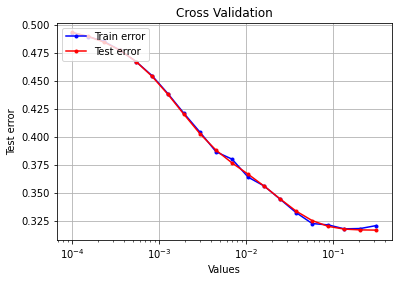

Best gamma is 0.31622776601683794 with loss 0.31667266409225403


In [177]:
gammas = np.logspace(-4, -0.5, 20)

best_gamma, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'gamma', gammas, max_iters=100, poly_exp=1)
print("Best gamma is {} with loss {}".format(best_gamma, best_loss))

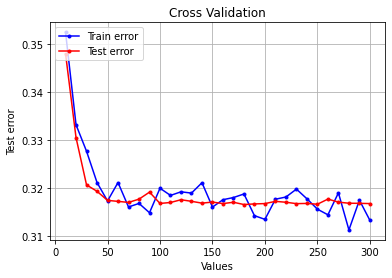

Best max_iters is 180 with loss 0.3165231580877593


In [175]:
max_iter_values = (np.arange(30)+1)*10

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'max_iters', max_iter_values, logspace=False, gamma=0.3, poly_exp=1)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

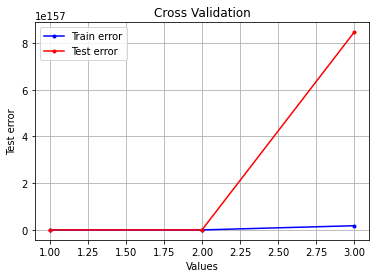

Best max_iters is 2 with loss 0.2921937570762111


In [263]:
expansion_values = [1, 2, 3]

best_iter, best_loss = find_best_parameter(y_clean, tX_clean, 'stochastic_gradient_descent', 'poly_exp', expansion_values, logspace=False, k_fold=4, max_iters=100, gamma=0.03)
print("Best max_iters is {} with loss {}".format(best_iter, best_loss))

### Least Squares

In [30]:
weights, t_loss = model_data(y_train, tX_train, 'least_squares')
weights_clean, t_loss_clean = model_data(y_train_clean, tX_train_clean, 'least_squares')

print("Training loss : {}".format(t_loss))
print("Validation loss : {}".format(get_loss(y_validation, tX_validation, weights)))
print("Clean Training loss : {}".format(t_loss_clean))
print("Clean Validation loss : {}".format(get_loss(y_validation_clean, tX_validation_clean, weights_clean)))

LinAlgError: Singular matrix

### Ridge Regression

In [33]:
lambda_ = 1

weights, t_loss = model_data(y_train, tX_train, 'ridge_regression')
weights_clean, t_loss_clean = model_data(y_train_clean, tX_train_clean, 'ridge_regression')

print("Training loss : {}".format(t_loss))
print("Validation loss : {}".format(get_loss(y_validation, tX_validation, weights)))
print("Clean Training loss : {}".format(t_loss_clean))
print("Clean Validation loss : {}".format(get_loss(y_validation_clean, tX_validation_clean, weights_clean)))

Training loss : 0.3394307923454777
Validation loss : 0.340752914694699
Clean Training loss : 0.3160824486682263
Clean Validation loss : 0.31660876070532173


### (Penalized) Logistic Regression

In [32]:
max_iters = 500
gamma = 0.05
lambda_ = 0.1

weights_log, loss_log = model_data(y_train_clean, tX_train_clean, 'logistic_regression', 
                                   max_iters=max_iters, gamma=gamma) 
weights_p_log, loss_p_log = model_data(y_train_clean, tX_train_clean, 'regularized_logistic_regression', 
                                   max_iters=max_iters, gamma=gamma, lambda_=lambda_) 


print("Training loss : {}".format(loss_log))
print("Validation loss : {}".format(get_log_likelihood(y_validation_clean, tX_validation_clean, weights_log)))
print("Penalized Training loss : {}".format(loss_p_log))
print("Penalized Validation loss : {}".format(get_log_likelihood(y_validation_clean, tX_validation_clean, weights_p_log)))

Training loss : 0.49257246299299384
Validation loss : 0.4933662181455044
Penalized Training loss : 0.5809898625001401
Penalized Validation loss : 0.5350475857372223


## Generate predictions and save ouput in csv format for submission:

In [270]:
#This enable to run all cells without running this one when unnecessary
if True :
    y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
    y_test_clean, tX_test_clean, ids_test_clean = clean_test(y_test, tX_test, ids_test)
    tX_test_clean_poly = build_poly_2D(tX_test_clean, 2)
    OUTPUT_PATH = DATA_FOLDER + 'submission.csv' 
    if False: ## Only for logistic regression, we will do something nice later
        y_pred = predict_labels_logistic(weights_clean, tX_test_clean_poly)
    else:
        y_pred = predict_labels(weights, tX_test_clean_poly)
    create_csv_submission(ids_test_clean, y_pred, OUTPUT_PATH)
else :
    print("Change False to True to generate prediction")

ValueError: shapes (568238,87) and (90,) not aligned: 87 (dim 1) != 90 (dim 0)